# Key insights from F. Huszar tutorial C.I. in everyday ML

Youtube Video Link: [pt.1](https://youtu.be/HOgx_SBBzn0) [pt.2](https://www.youtube.com/watch?v=_RtxTpOb8e4)


## Quick overview of main C.I. concepts

3 types of Causal Diagram conditions that can affect **Intervention** Estimate:
* Confounder: $ x \leftarrow z \rightarrow y $  
* Mediator: $ x \rightarrow z \rightarrow y $  
* Collider: $ x \rightarrow z \leftarrow y $  

Confounder:

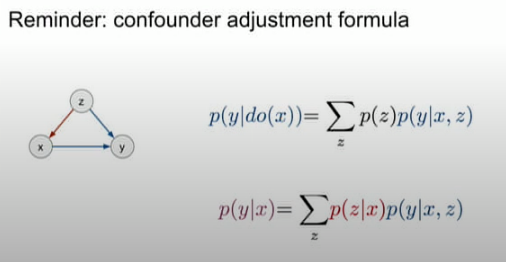

In [161]:
from IPython.display import Image
Image('img/confounfer_formula.PNG',width=500)

Mediator:

## Toy example : obs. data + graph vs obs. data only

The following example demonstrates how in an intervention case, we need a **Graph Assumption** as well as Observation Data, to modelize correctely the statistical problem.  
Indeed we show that w/o a Gtaph Assumption we're able only to estimate P(Y|X), but P(Y|do(X)), that is the Probablility of Y setting variable X to a value.  

In [85]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
print("pandas v: {}".format(pd.__version__))

pandas v: 0.22.0


## Case 1 (  $ x \rightarrow y $ )

$ x \sim N(0,1) $  
$ y = x + \sqrt(3)*N(0,1) $


Pearson coef. : 0.52


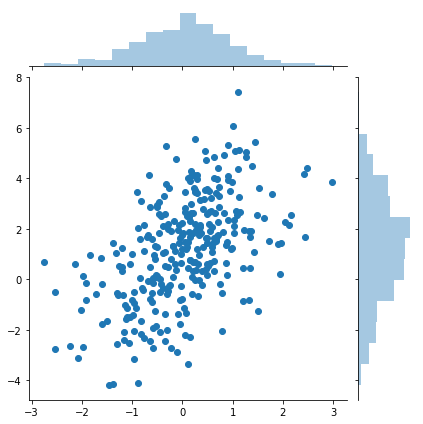

In [51]:
x = np.random.randn(300)
y = x + 1 + np.sqrt(3)*np.random.randn(300)
_=sns.jointplot(x,y)
print("Pearson coef. : {:.2f}".format(np.corrcoef(x,y)[0,1]))

## Case 2 (  $ y \rightarrow x $ )

$ y \sim 1+2*N(0,1) $  
$ x= (y-1)*0.25 + \sqrt(3)*N(0,1)/2 $


Pearson coef. : 0.52


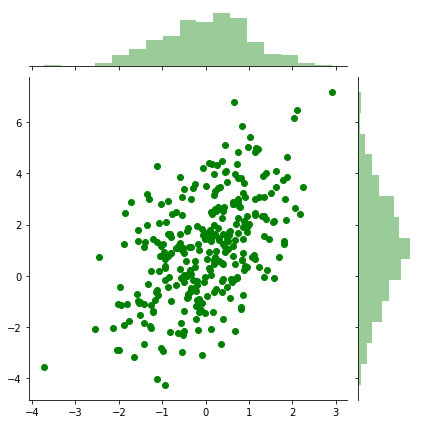

In [52]:
y = 1 +2*np.random.randn(300)
x = (y-1)/4 + np.sqrt(3)*np.random.randn(300)/2
_=sns.jointplot(x,y,color='green')
print("Pearson coef. : {:.2f}".format(np.corrcoef(x,y)[0,1]))

## Case 3 (  $ x \leftarrow z \rightarrow y $ )

$ z \sim N(0,1) $  
$ y = z + 1 + \sqrt(3)*N(0,1) $  
$ x = z$


Pearson coef. : 0.56


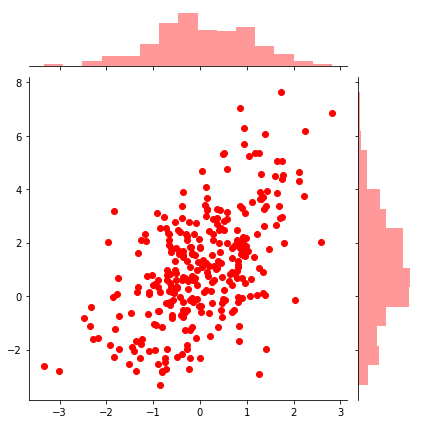

In [53]:
z = np.random.randn(300)
y = z + 1 + np.sqrt(3)*np.random.randn(300)
x = z
_=sns.jointplot(x,y,color='red')
print("Pearson coef. : {:.2f}".format(np.corrcoef(x,y)[0,1]))

Looking only at the **Observational data**, you could assume that Joint Distribution P(X,Y) or Conditional Distribution Y|X are the same:
* distribution shape are similar
* Pearson coeff. is quite the same

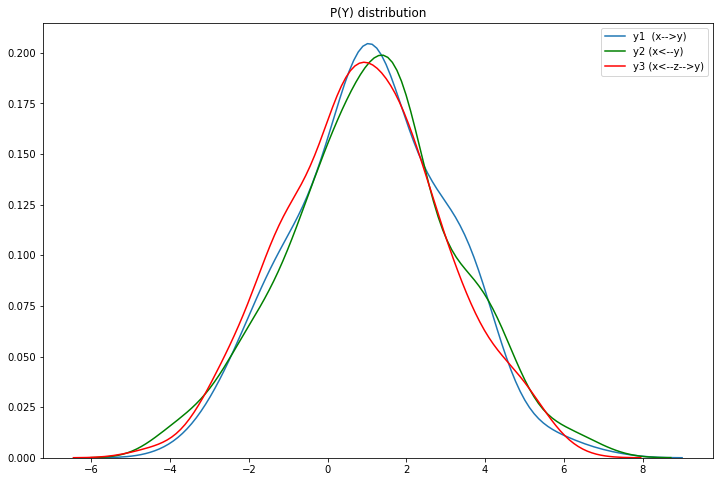

In [158]:
x = np.random.randn(300)
y = x + 1 + np.sqrt(3)*np.random.randn(300)
sns.distplot(a=y,hist=False,label='y1  (x-->y)')
y = 1 +2*np.random.randn(300)
x = (y-1)/4 + np.sqrt(3)*np.random.randn(300)/2
sns.distplot(a=y,hist=False,color='green',label='y2 (x<--y)')
z = np.random.randn(300)
y = z + 1 + np.sqrt(3)*np.random.randn(300)
x = z
_=sns.distplot(a=y,color='red',hist=False,label='y3 (x<--z-->y)')
_=plt.title('P(Y) distribution')

$ P(Y|X=3) $

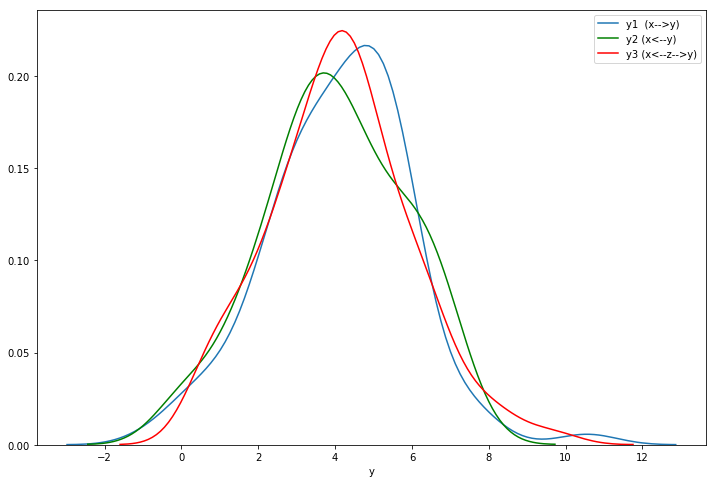

In [159]:
# y1
x = np.random.randn(1000000)
y = x + 1 + np.sqrt(3)*np.random.randn(1000000)
df = pd.DataFrame({'x':x, 'y':y})
sns.distplot(df.y[(df.x >= 3 - 0.01) & (df.x <= 3 + 0.01)],hist=False,label='y1  (x-->y)')
# y2
y = 1 +2*np.random.randn(1000000)
x = (y-1)/4 + np.sqrt(3)*np.random.randn(1000000)/2
df = pd.DataFrame({'x':x, 'y':y})
sns.distplot(a=df.y[(df.x >= 3 - 0.01) & (df.x <= 3 + 0.01)],hist=False,color='green',label='y2 (x<--y)')
# y3
z = np.random.randn(1000000)
y = z + 1 + np.sqrt(3)*np.random.randn(1000000)
x = z
df = pd.DataFrame({'x':x, 'y':y})
_=sns.distplot(a=df.y[(df.x >= 3 - 0.01) & (df.x <= 3 + 0.01)],color='red',hist=False,label='y3 (x<--z-->y)')

$ P(Y|do(X=3)) $

Now, if we set X=3 in each case, we will see that marginal distribution of Y will be different:

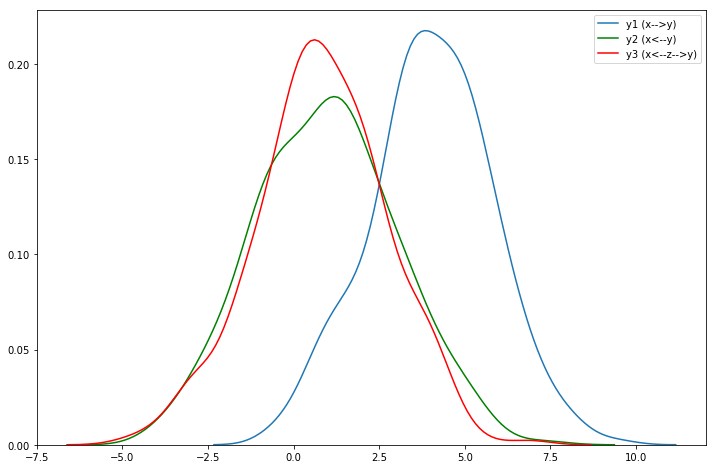

In [160]:
_=sns.distplot(a= 3 + 1 + np.sqrt(3)*np.random.randn(300),hist=False,label='y1 (x-->y)')
_=sns.distplot(a=1 +2*np.random.randn(300),hist=False,color='green',label='y2 (x<--y)')
_=sns.distplot(a=np.random.randn(300) + 1 + np.sqrt(3)*np.random.randn(300),color='red',hist=False,label='y3 (x<--z-->y)')

<u>Recap</u>

* ML is applied on P(Y|X), that is the Joint/Conditional Distribution
* By adding a Graph Assumpution, we are able to estimate P(Y|do(X)), that is the P. of Y under intervention on X.
* In some cases, like in mediator one, P(Y|X) = P(Y|do(X)), in other cases, such as with Counfonder Variables, P(Y|X) != P(Y|do(X)) 

So, how to calculate correctely P(Y|do(X)) in the three cases?

Case 1: 
$ x \rightarrow y $  
So $ P(Y|do(X)) =  P(Y|X) $  
**Variable Adjustment**


Case 2:
$ x \leftarrow y $  
So $ P(Y|do(X)) = P(Y) $, since X doesn't affect Y distribution  
**No Variable Adjustment**

Case 3:
$ x \leftarrow z \rightarrow y $  
So $ P(Y|do(X)) = P(Y) $, for the same reason as above  
**No Variable Adjustment**


This is the application of *do-calculus* for which, with causal diagram assumptions, you can estimate intervention Prob, with observational Prob measures: P(X,Y), P(Y|X), P(X|Y), P(X), P(Y).

## Conterfactual (SEM)

Conterfactual Example Question:  
*Would Hilary Clinton have won elections if she visited Michigan 3 days before election day?* 